# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [282]:
import requests
from pprint import pprint
import json
import os
from citipy import citipy
import random
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import time


plt.style.use('seaborn-poster')

CITIES_TOT = 50
SETS_NUM = 25
API_KEY = '726f6729b1b0ce3ac75298331adb8ac7'
URL = "https://api.openweathermap.org/data/2.5/weather?"


In [283]:
random.seed(7)
ran_lat= [random.uniform(-90,90) for _ in range(CITIES_TOT)]
ran_long = [random.uniform(-180,180) for _ in range(CITIES_TOT)]
dd = list(zip(ran_lat,ran_long))
dd

[(-31.71010233003077, 172.86294509732954),
 (-62.84714869358965, -137.49631982821364),
 (27.16820514717368, -29.475784157318202),
 (-76.9614683998423, 92.5707346434898),
 (6.4587607752040554, -125.28556752221829),
 (-24.17599495573461, -3.973283828709981),
 (-79.56019354055277, -165.88538746292244),
 (1.3384319740956414, 60.557708352382264),
 (-83.25078148044273, 95.2455118366127),
 (-11.943776940770547, 26.289338499858218),
 (-77.4260237565686, 135.17201225911975),
 (-73.67165759810429, -67.05089537468517),
 (-13.586545954347486, 70.30633185851735),
 (58.83338244096686, 33.97315575780664),
 (-67.71564699306379, 28.762273541697198),
 (-49.81698637073738, -15.766080731491314),
 (22.93798003300607, 122.38840098451487),
 (80.58760964226101, 160.08519423885747),
 (13.878530751149754, -9.324598528927993),
 (-18.597514562859573, 59.09479397088282),
 (85.7259190067256, -158.1590060650009),
 (-81.61511748880388, 72.53712766959259),
 (64.52432262876232, 52.966387629960764),
 (-37.87032846029827

In [284]:
cities = []

def generate_cities(lat):
    for rows in lat:
        city = citipy.nearest_city(rows[0],rows[1])
        cities.append(city.city_name)

generate_cities(dd)
final_cities = list(set(cities))
final_cities = [cities[i:i+SETS_NUM] for i in range(0, len(cities), SETS_NUM)]
final_cities

[['ahipara',
  'rikitea',
  'ponta do sol',
  'busselton',
  'atuona',
  'jamestown',
  'mataura',
  'victoria',
  'albany',
  'kansanshi',
  'hobart',
  'ushuaia',
  'hithadhoo',
  'borovichi',
  'port elizabeth',
  'jamestown',
  'yuli',
  'cherskiy',
  'kita',
  'grand gaube',
  'barrow',
  'taolanaro',
  'shchelyayur',
  'opotiki',
  'albany'],
 ['ushuaia',
  'laguna',
  'yekaterinburg',
  'vaini',
  'tambacounda',
  'guerrero negro',
  'rikitea',
  'hilo',
  'albany',
  'rikitea',
  'punta arenas',
  'ribeira grande',
  'jabiru',
  'mataura',
  'dakar',
  'malanje',
  'victor harbor',
  'verkh-usugli',
  'hamada',
  'castro',
  'sao filipe',
  'saint-georges',
  'deputatskiy',
  'severo-kurilsk',
  'rikitea']]

## Generate Cities List

In [285]:
json_data = []
print("""Beginning Data Retrieval     
---------------------------------------""")
def get_weather_data(cities,set_num):

    for enum,city in enumerate(cities,start=1):  
        parameters = {
            'q' : city,
            'appid' : API_KEY,
            'units':'metric'

        }
        try:
            
            data_request = requests.get(URL,params =parameters ).json()
            print(f"Processing Record {enum} of Set {set_num} | {data_request['name']}")
            
            
        except:
            print("City not found. Skipping...")
        finally:
            json_data.append(data_request)
#             time.sleep(1)

for n in range(len(final_cities)):
            get_weather_data(final_cities[n],n+1)
            time.sleep(1)
 
print("""-----------------------------
Data Retrieval Complete      
-----------------------------""")

Beginning Data Retrieval     
---------------------------------------
Processing Record 1 of Set 1 | Ahipara
Processing Record 2 of Set 1 | Rikitea
Processing Record 3 of Set 1 | Ponta do Sol
Processing Record 4 of Set 1 | Busselton
Processing Record 5 of Set 1 | Atuona
Processing Record 6 of Set 1 | Jamestown
Processing Record 7 of Set 1 | Mataura
Processing Record 8 of Set 1 | Hong Kong
Processing Record 9 of Set 1 | Albany
Processing Record 10 of Set 1 | Kansanshi
Processing Record 11 of Set 1 | Hobart
Processing Record 12 of Set 1 | Ushuaia
Processing Record 13 of Set 1 | Hithadhoo
Processing Record 14 of Set 1 | Borovichi
Processing Record 15 of Set 1 | Port Elizabeth
Processing Record 16 of Set 1 | Jamestown
Processing Record 17 of Set 1 | Yuli
Processing Record 18 of Set 1 | Cherskiy
Processing Record 19 of Set 1 | Kita
Processing Record 20 of Set 1 | Grand Gaube
Processing Record 21 of Set 1 | Barrow
City not found. Skipping...
City not found. Skipping...
Processing Record 24 o

In [286]:
pprint(json_data)

[{'base': 'stations',
  'clouds': {'all': 99},
  'cod': 200,
  'coord': {'lat': -35.17, 'lon': 173.17},
  'dt': 1602435690,
  'id': 2194098,
  'main': {'feels_like': 13.94,
           'grnd_level': 1021,
           'humidity': 91,
           'pressure': 1023,
           'sea_level': 1023,
           'temp': 15.44,
           'temp_max': 15.44,
           'temp_min': 15.44},
  'name': 'Ahipara',
  'sys': {'country': 'NZ', 'sunrise': 1602438515, 'sunset': 1602484725},
  'timezone': 46800,
  'visibility': 10000,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 15, 'speed': 3.94}},
 {'base': 'stations',
  'clouds': {'all': 0},
  'cod': 200,
  'coord': {'lat': -23.12, 'lon': -134.97},
  'dt': 1602435399,
  'id': 4030556,
  'main': {'feels_like': 22.19,
           'grnd_level': 1020,
           'humidity': 79,
           'pressure': 1023,
           'sea_level': 1023,
           'temp

           'humidity': 69,
           'pressure': 1008,
           'sea_level': 1008,
           'temp': 28.04,
           'temp_max': 28.04,
           'temp_min': 28.04},
  'name': 'Yuli',
  'sys': {'country': 'NG', 'sunrise': 1602392817, 'sunset': 1602435832},
  'timezone': 3600,
  'visibility': 10000,
  'weather': [{'description': 'clear sky',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 175, 'speed': 2.29}},
 {'base': 'stations',
  'clouds': {'all': 19},
  'cod': 200,
  'coord': {'lat': 68.75, 'lon': 161.3},
  'dt': 1602435695,
  'id': 2126199,
  'main': {'feels_like': -13.12,
           'grnd_level': 1022,
           'humidity': 94,
           'pressure': 1022,
           'sea_level': 1022,
           'temp': -7.55,
           'temp_max': -7.55,
           'temp_min': -7.55},
  'name': 'Cherskiy',
  'sys': {'country': 'RU', 'sunrise': 1602446966, 'sunset': 1602481971},
  'timezone': 39600,
  'visibility': 10000,
  'we

  'sys': {'country': 'MX', 'sunrise': 1602423269, 'sunset': 1602465049},
  'timezone': -21600,
  'visibility': 10000,
  'weather': [{'description': 'clear sky',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 317, 'speed': 6.1}},
 {'base': 'stations',
  'clouds': {'all': 0},
  'cod': 200,
  'coord': {'lat': -23.12, 'lon': -134.97},
  'dt': 1602435399,
  'id': 4030556,
  'main': {'feels_like': 22.19,
           'grnd_level': 1020,
           'humidity': 79,
           'pressure': 1023,
           'sea_level': 1023,
           'temp': 22.95,
           'temp_max': 22.95,
           'temp_min': 22.95},
  'name': 'Rikitea',
  'sys': {'country': 'PF', 'sunrise': 1602426601, 'sunset': 1602471751},
  'timezone': -32400,
  'visibility': 10000,
  'weather': [{'description': 'clear sky',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 81, 'speed': 5.77}},
 {'base': 'stations',


               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 41, 'speed': 3.84}},
 {'base': 'stations',
  'clouds': {'all': 40},
  'cod': 200,
  'coord': {'lat': 12.06, 'lon': -61.75},
  'dt': 1602435705,
  'id': 3579925,
  'main': {'feels_like': 32.3,
           'humidity': 70,
           'pressure': 1012,
           'temp': 31,
           'temp_max': 31,
           'temp_min': 31},
  'name': "St. George's",
  'sys': {'country': 'GD',
          'id': 8781,
          'sunrise': 1602410175,
          'sunset': 1602453038,
          'type': 1},
  'timezone': -14400,
  'visibility': 10000,
  'weather': [{'description': 'scattered clouds',
               'icon': '03d',
               'id': 802,
               'main': 'Clouds'}],
  'wind': {'deg': 100, 'speed': 7.2}},
 {'base': 'stations',
  'clouds': {'all': 97},
  'cod': 200,
  'coord': {'lat': 69.3, 'lon': 139.9},
  'dt': 1602435705,
  'id': 2028164,
  'main': {'feels_like': -13.96,
        

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [231]:
# df = pd.DataFrame({
#     'City':[city['name'] for city in json_data[0]]
# })
city_name = []
latitude = []
longitude =  []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
for data in json_data:
    try:
        city_name.append(data['name'])
        latitude.append(data['coord']['lat'])
        longitude.append(data['coord']['lon'])
        max_temp.append(data['main']['temp_max'])
        humidity.append(data['main']['humidity'])
        cloudiness.append(data['clouds']['all'])
        wind_speed.append(data['wind']['speed'])
        country.append(data['sys']['country'])
        date.append(data['dt'])
    except:
        pass
    
    
df = pd.DataFrame({
    'City':city_name,
    'Lat':latitude,
    'Lng':longitude,
    'Max Temp':max_temp,
    'Humidity':humidity,
    'Cloudiness':cloudiness,
    'Wind Speed':wind_speed,
    'Country':country,
    'Date':date
})

df.sort_values(by = 'City',ascending = True,inplace = True)
df.reset_index(drop = True,inplace = True)
df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.60,-73.97,13.33,49,53,3.19,US,1602435089
1,Aloleng,16.13,119.78,25.39,94,100,6.95,PH,1602435087
2,Atuona,-9.80,-139.03,25.61,73,27,10.85,PF,1602435063
3,Atuona,-9.80,-139.03,25.61,73,27,10.85,PF,1602435063
4,Bathsheba,13.22,-59.52,30.00,70,20,6.20,BB,1602435100
5,Bethel,41.37,-73.41,17.22,55,40,4.10,US,1602435079
6,Bluff,-46.60,168.33,11.67,90,87,4.92,NZ,1602435084
7,Busselton,-33.65,115.33,10.56,73,0,2.85,AU,1602435081
8,Cidreira,-30.18,-50.21,19.66,66,0,7.75,BR,1602435076
9,Dikson,73.51,80.55,2.65,99,100,6.15,RU,1602434929


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [232]:
df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,4.500000e+01
mean,17.035778,-10.267556,15.842889,74.222222,50.400000,5.206667,1.602435e+09
std,39.641568,100.783713,9.782357,17.434147,36.862398,3.860895,3.312476e+01
min,-54.800000,-175.200000,-5.260000,32.000000,0.000000,1.000000,1.602435e+09
25%,-20.410000,-73.970000,8.000000,58.000000,20.000000,2.340000,1.602435e+09
50%,25.050000,-45.240000,13.330000,73.000000,50.000000,4.330000,1.602435e+09
75%,52.420000,88.470000,24.860000,90.000000,80.000000,6.200000,1.602435e+09
max,73.510000,168.330000,35.000000,100.000000,100.000000,18.000000,1.602435e+09


In [233]:
df_copy = df.copy()
df_humidity_100 = df_copy.loc[df['Humidity']>=100]
df_humidity_100.index

Int64Index([32], dtype='int64')

In [234]:
clean_city_data = df_copy.drop(axis=0, index=df_humidity_100.index,inplace=False)
clean_city_data.reset_index(drop = True,inplace = True)
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.60,-73.97,13.33,49,53,3.19,US,1602435089
1,Aloleng,16.13,119.78,25.39,94,100,6.95,PH,1602435087
2,Atuona,-9.80,-139.03,25.61,73,27,10.85,PF,1602435063
3,Atuona,-9.80,-139.03,25.61,73,27,10.85,PF,1602435063
4,Bathsheba,13.22,-59.52,30.00,70,20,6.20,BB,1602435100
5,Bethel,41.37,-73.41,17.22,55,40,4.10,US,1602435079
6,Bluff,-46.60,168.33,11.67,90,87,4.92,NZ,1602435084
7,Busselton,-33.65,115.33,10.56,73,0,2.85,AU,1602435081
8,Cidreira,-30.18,-50.21,19.66,66,0,7.75,BR,1602435076
9,Dikson,73.51,80.55,2.65,99,100,6.15,RU,1602434929


In [235]:
clean_city_data['City'].value_counts()

Atuona                   2
Nikolskoye               2
Nanortalik               2
Punta Arenas             2
Ushuaia                  1
San Cristobal            1
Mabaruma                 1
Jiwani                   1
Jiuquan                  1
Imeni Poliny Osipenko    1
New Norfolk              1
El Tocuyo                1
Vaini                    1
Bathsheba                1
Albany                   1
Thakurgaon               1
Mount Gambier            1
Cidreira                 1
East London              1
Busselton                1
São João da Barra        1
Hilo                     1
Aloleng                  1
Izvestkovyy              1
Khatanga                 1
Jamestown                1
Sitka                    1
Mahébourg                1
Sahuaripa                1
Dikson                   1
Provideniya              1
Bethel                   1
Lenoir City              1
George Town              1
Fevik                    1
Tasiilaq                 1
Puerto Ayora             1
N

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [236]:
#  Get the indices of cities that have humidity over 100%.


In [237]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

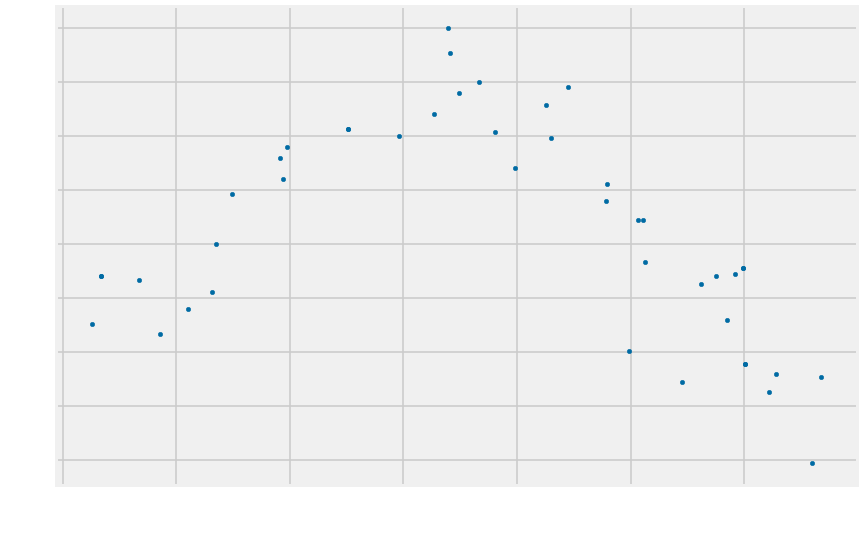

In [276]:
clean_city_data.plot(kind='scatter',x = 'Lat',y ='Max Temp' )
plt.show()

## Latitude vs. Humidity Plot

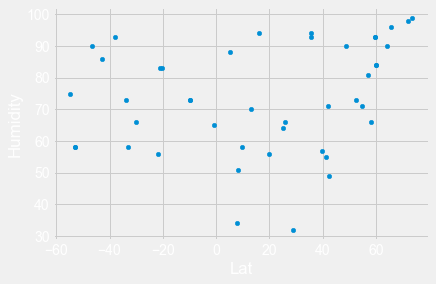

In [254]:
clean_city_data.plot(kind='scatter',x = 'Lat',y ='Humidity' )
plt.show()

## Latitude vs. Cloudiness Plot

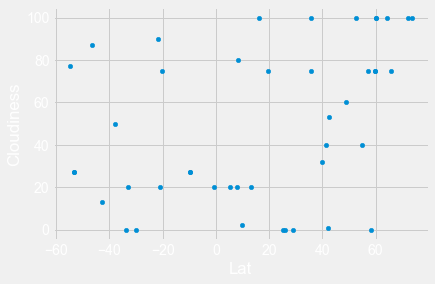

In [255]:
clean_city_data.plot(kind='scatter',x = 'Lat',y ='Cloudiness' )
plt.show()

## Latitude vs. Wind Speed Plot

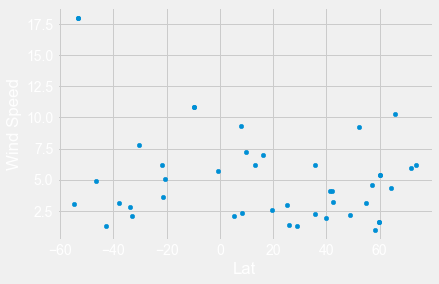

In [256]:
clean_city_data.plot(kind='scatter',x = 'Lat',y ='Wind Speed' )
plt.show()

## Linear Regression

In [257]:
north_hem = clean_city_data.copy()
north_hem = north_hem.loc[north_hem['Lng'] > 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

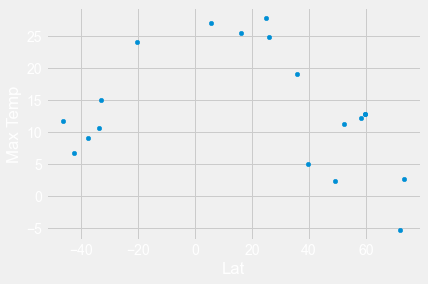

In [258]:
north_hem.plot(kind = 'scatter',x = 'Lat',y = 'Max Temp')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

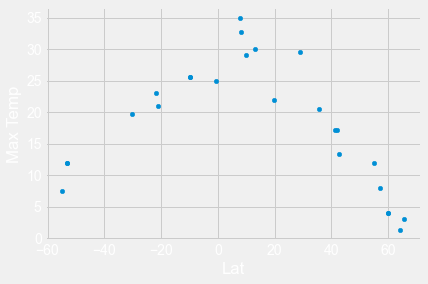

In [259]:
south_hem = clean_city_data.copy()
south_hem = south_hem.loc[south_hem['Lng'] < 0]
south_hem.plot(kind = 'scatter',x = 'Lat',y = 'Max Temp')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

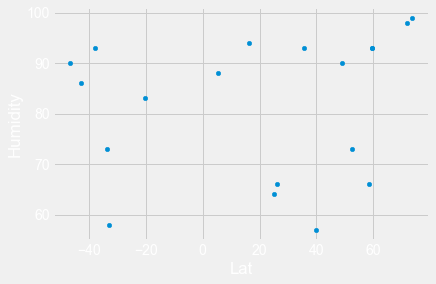

In [260]:
north_hem.plot(kind = 'scatter',x = 'Lat',y = 'Humidity')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

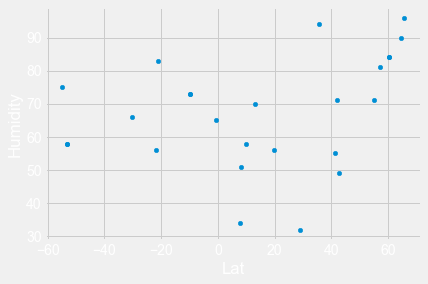

In [261]:
south_hem.plot(kind = 'scatter',x = 'Lat',y = 'Humidity')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

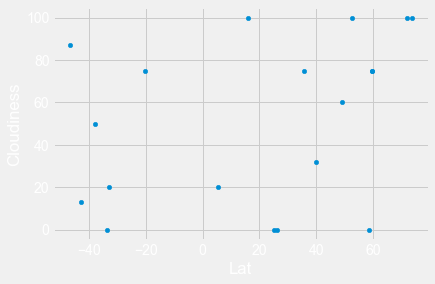

In [262]:
north_hem.plot(kind = 'scatter',x = 'Lat',y = 'Cloudiness')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

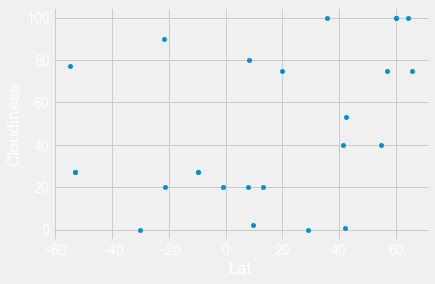

In [263]:
south_hem.plot(kind = 'scatter',x = 'Lat',y = 'Cloudiness')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

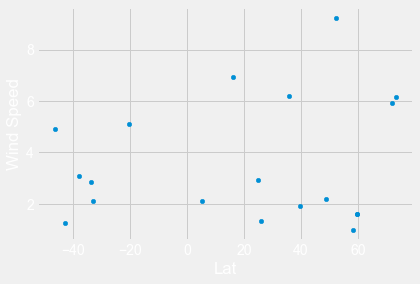

In [264]:
north_hem.plot(kind = 'scatter',x = 'Lat',y = 'Wind Speed')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

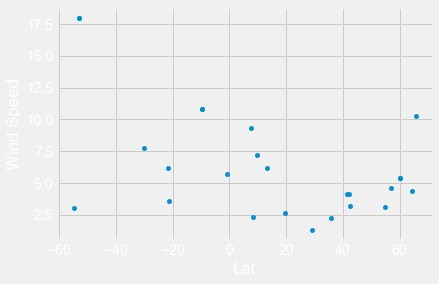

In [265]:
south_hem.plot(kind = 'scatter',x = 'Lat',y = 'Wind Speed')
plt.show()